C:\Users\Sakuntala\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.3470 - loss: 1.7793 - val_accuracy: 0.5210 - val_loss: 1.3520
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5467 - loss: 1.2835 - val_accuracy: 0.5621 - val_loss: 1.2387
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5913 - loss: 1.1649 - val_accuracy: 0.5871 - val_loss: 1.1764
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6203 - loss: 1.0836 - val_accuracy: 0.5934 - val_loss: 1.1431
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6422 - loss: 1.0270 - val_accuracy: 0.6102 - val_loss: 1.1252
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6597 - loss: 0.9701 - val_accuracy: 0.6069 - val_loss: 1.1431
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6745 - loss: 0.9401 - val_accuracy: 0.6203 - val_loss: 1.0905
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6850 - loss: 0

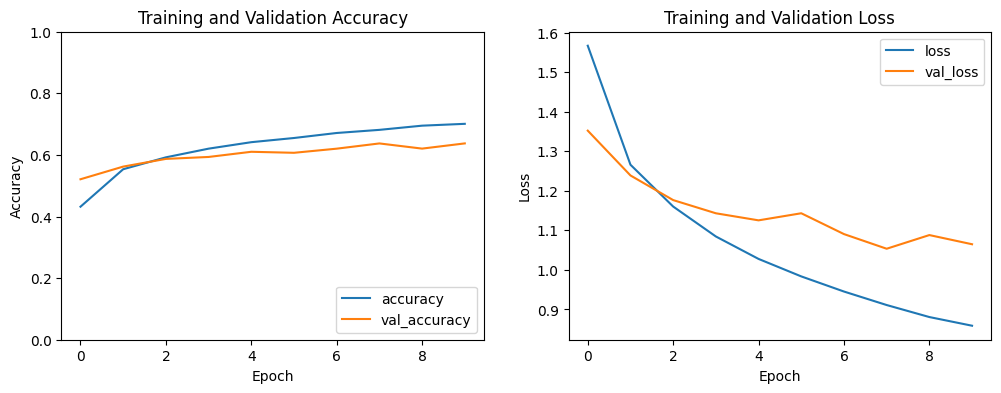

In [1]:
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

def build_model():
    model = models.Sequential()
    
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Flatten())
    
    model.add(layers.Dense(64, activation='relu'))
    
    model.add(layers.Dense(10, activation='softmax'))
    
    return model

def compile_model(model):
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

def train_model(model, train_images, train_labels, test_images, test_labels, epochs=10):
    history = model.fit(train_images, train_labels, epochs=epochs, 
                        validation_data=(test_images, test_labels))
    return history

def evaluate_model(model, test_images, test_labels):
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
    print(f'Test accuracy: {test_acc}')
    return test_loss, test_acc


model = build_model()
compile_model(model)
history = train_model(model, train_images, train_labels, test_images, test_labels, epochs=10)
evaluate_model(model, test_images, test_labels)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
